In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


## To-do

### Use Plotly, and refresh on pandas.

In [2]:
def makedf(path):
    df = pd.DataFrame(pd.read_csv(path))
    return df 

In [3]:
df_oil = makedf('/kaggle/input/store-sales-time-series-forecasting/oil.csv')

In [4]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


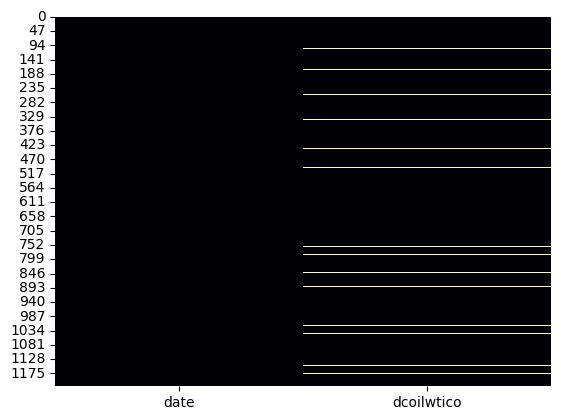

In [5]:
sns.heatmap(df_oil.isnull(),cmap = 'magma',cbar = False);

In [6]:
df_oil.describe().T

,count,mean,std,min,25%,50%,75%,max
dcoilwtico,1175.0,67.714366,25.630476,26.19,46.405,53.19,95.66,110.62


In [7]:
df1 = df_oil.copy(deep = True)
df1['date'] = pd.to_datetime(df1['date'])
df1.set_index('date',inplace = True)

### Interpolate, fill in missing values based on surrounding values.

In [8]:
df1['dcoilwtico'].interpolate(method='time', inplace=True)  # Time-based interpolation


#filling in the first NaN value since time-based interpolation relies on behind and front values.
# Backward fill.
df1['dcoilwtico'].fillna(method='bfill', inplace=True) 


In [9]:
df1

,dcoilwtico
date,
2013-01-01,93.14
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


In [10]:
df1.isna().sum()

dcoilwtico    0
dtype: int64

/tmp/ipykernel_19/3646230202.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['dcoilwtico']);
/tmp/ipykernel_19/3646230202.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['dcoilwtico']);


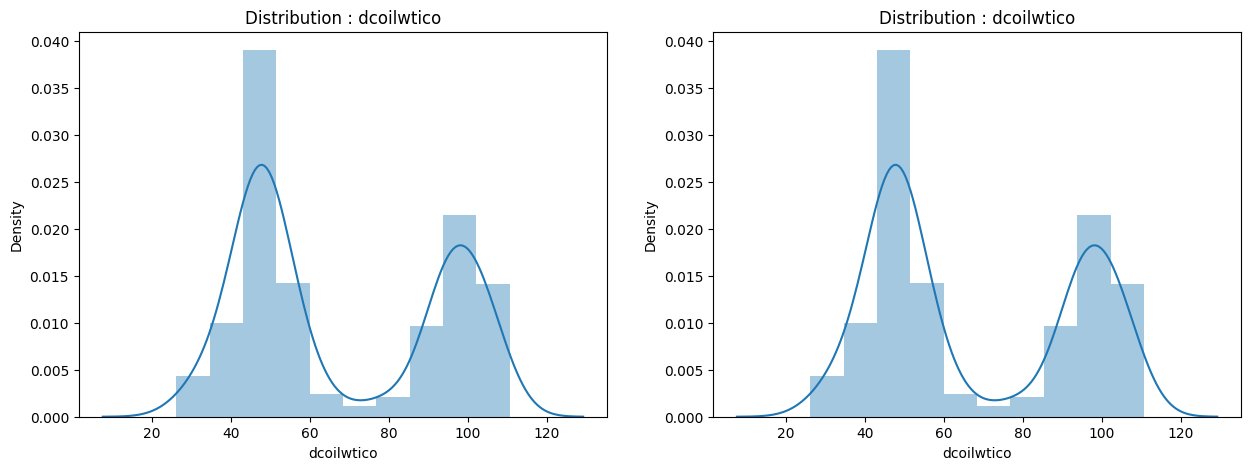

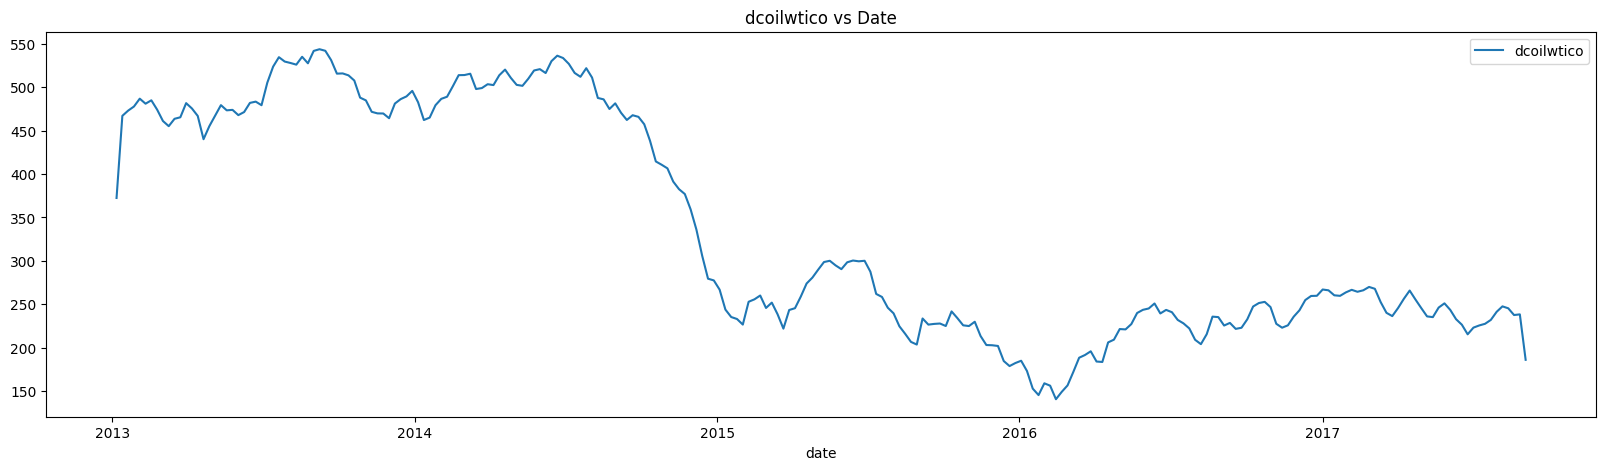

In [11]:
color1 = ['#296C92','#3EB489']
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(df1['dcoilwtico']);
plt.title('Distribution : dcoilwtico')

plt.subplot(1,2,2)
sns.distplot(df1['dcoilwtico']);
plt.title('Distribution : dcoilwtico')

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(df1.resample('W').sum());
plt.title('dcoilwtico vs Date')

plt.show()
fig.tight_layout(pad = 2)

In [12]:
df_train = makedf('/kaggle/input/store-sales-time-series-forecasting/train.csv')
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [13]:
df_train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [14]:
df_store = makedf('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
df_store

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [15]:
df_store.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [16]:
df_holy = makedf('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
df_holy

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [17]:
df_holy.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [18]:
df_trans = makedf('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
df_trans

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [19]:
df_trans.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

### df_store into df_train.

In [20]:
merged_train = pd.merge(df_train, df_store, on='store_nbr', how='left')

In [21]:
merged_train

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


In [22]:
grouped_df = merged_train.groupby('family')

In [23]:
for name, group in grouped_df:
    print(f"Category: {name}")
    print(group)
    print("\n")
    globals()[f'df_{name.replace(" ", "_").replace("/", "_").replace(",", "_")}'] = pd.DataFrame(group)


Category: AUTOMOTIVE
              id        date  store_nbr      family  sales  onpromotion  \
0              0  2013-01-01          1  AUTOMOTIVE    0.0            0   
33            33  2013-01-01         10  AUTOMOTIVE    0.0            0   
66            66  2013-01-01         11  AUTOMOTIVE    0.0            0   
99            99  2013-01-01         12  AUTOMOTIVE    0.0            0   
132          132  2013-01-01         13  AUTOMOTIVE    0.0            0   
...          ...         ...        ...         ...    ...          ...   
3000723  3000723  2017-08-15         54  AUTOMOTIVE    8.0            0   
3000756  3000756  2017-08-15          6  AUTOMOTIVE    7.0            0   
3000789  3000789  2017-08-15          7  AUTOMOTIVE    5.0            0   
3000822  3000822  2017-08-15          8  AUTOMOTIVE    4.0            0   
3000855  3000855  2017-08-15          9  AUTOMOTIVE   15.0            0   

              city      state type  cluster  
0            Quito  Pichincha   

### Analysis

graph each store in a category.

graph each category.sum() to compare category relation.

graph states in a category.

In [24]:
merged_train["family"].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [25]:
df_HOME_AND_KITCHEN_II

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
16,16,2013-01-01,1,HOME AND KITCHEN II,0.0,0,Quito,Pichincha,D,13
49,49,2013-01-01,10,HOME AND KITCHEN II,0.0,0,Quito,Pichincha,C,15
82,82,2013-01-01,11,HOME AND KITCHEN II,0.0,0,Cayambe,Pichincha,B,6
115,115,2013-01-01,12,HOME AND KITCHEN II,0.0,0,Latacunga,Cotopaxi,C,15
148,148,2013-01-01,13,HOME AND KITCHEN II,0.0,0,Latacunga,Cotopaxi,C,15
...,...,...,...,...,...,...,...,...,...,...
3000739,3000739,2017-08-15,54,HOME AND KITCHEN II,19.0,0,El Carmen,Manabi,C,3
3000772,3000772,2017-08-15,6,HOME AND KITCHEN II,37.0,2,Quito,Pichincha,D,13
3000805,3000805,2017-08-15,7,HOME AND KITCHEN II,44.0,5,Quito,Pichincha,D,8
3000838,3000838,2017-08-15,8,HOME AND KITCHEN II,35.0,2,Quito,Pichincha,D,8


In [26]:
familylist = []
familylist = merged_train["family"].unique()

In [27]:
print(familylist)

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


In [28]:
for i in familylist:
    df = globals()[f'df_{i.replace(" ", "_").replace("/", "_").replace(",", "_")}']
    df['date'] = pd.to_datetime(df['date'])
    agg_df = df.groupby('date')['sales'].sum().reset_index()
    globals()[f'agg_{i.replace(" ", "_").replace("/", "_").replace(",", "_")}'] = agg_df

### aggrigated datafram of its date and sales are made. Special characters and spaces are replaced with "_"

In [29]:
agg_BABY_CARE

,date,sales
0,2013-01-01,0.0
1,2013-01-02,0.0
2,2013-01-03,0.0
3,2013-01-04,0.0
4,2013-01-05,0.0
...,...,...
1679,2017-08-11,7.0
1680,2017-08-12,3.0
1681,2017-08-13,9.0
1682,2017-08-14,9.0


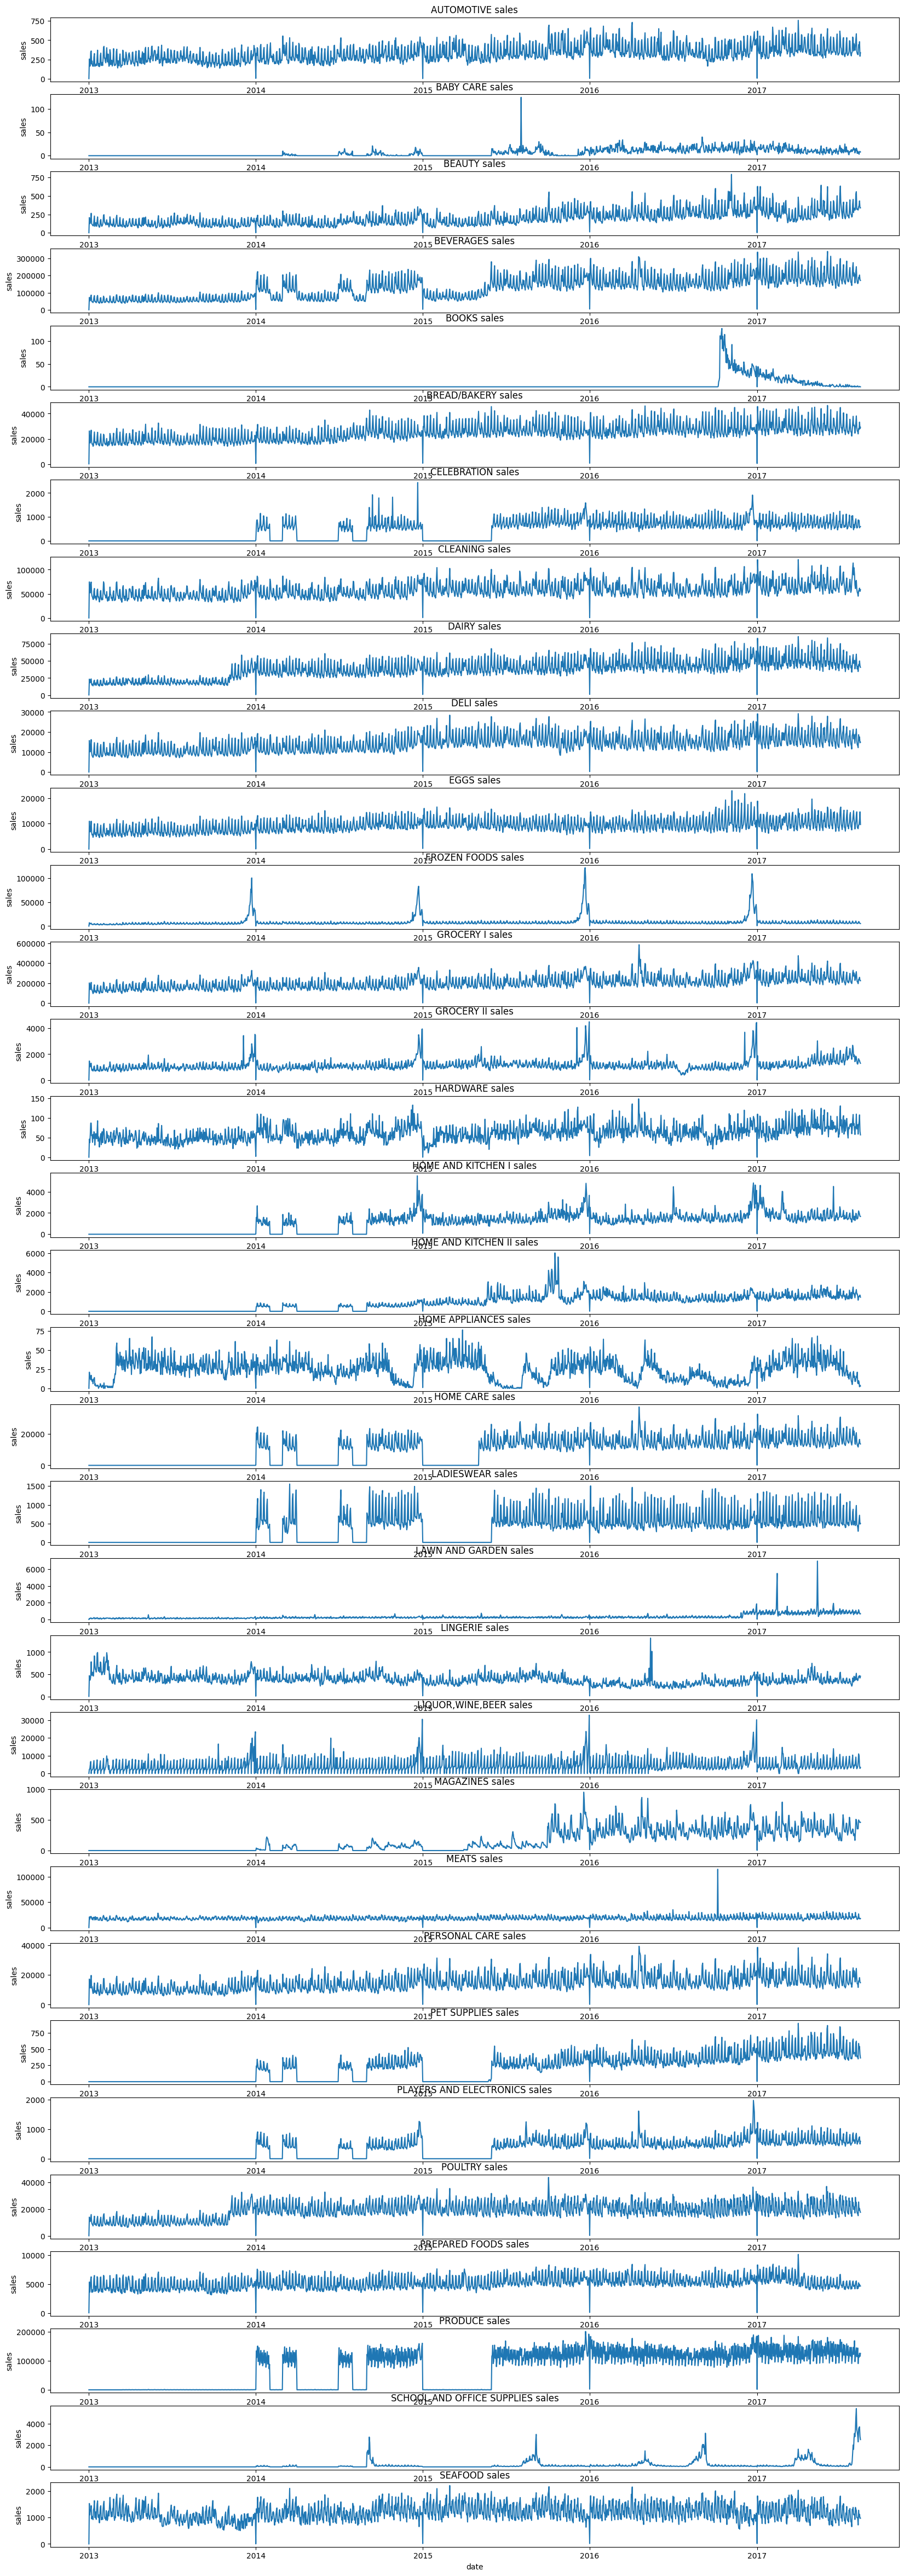

In [30]:
num = len(familylist)
fig, ax = plt.subplots(nrows=num, ncols=1, figsize=(20, 60))

for i, family_member in enumerate(familylist):
    plt.subplot(num, 1, i+1)  # i+1 because subplot indices start from 1
    df = globals()[f'agg_{family_member.replace(" ", "_").replace("/", "_").replace(",", "_")}']
    sns.lineplot(x=df['date'], y=df['sales'])
    plt.title(f'{family_member} sales')

plt.show()